In [1]:
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from glob import glob
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from os import listdir
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [2]:
import pandas as pd

data = pd.read_csv('df.csv')
data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')
data_eval = pd.read_csv('data_eval.csv')


In [3]:
data_path_train = "Flipkart/preprocessed_images_class_sup/train/"
data_path_test = "Flipkart/preprocessed_images_class_sup/test/"
data_path_eval = "Flipkart/preprocessed_images_class_sup/eval/"


In [4]:
# data_path = "Flipkart/preprocessed_images_class_sup/eval/"
# data['image_path'] = data_path + data['image']


In [5]:
# import os
# import random
# import shutil

# data_path = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/"

# # path to destination folders
# home_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_home"
# baby_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_baby"
# watches_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_watches"
# decor_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_decor"
# kitchen_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_kitchen"
# beauty_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_beauty"
# computers_folder = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_computers"

# # Create a list of image filenames in 'data_path'
# # Define a list of image extensions
# image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
# # Create a list of image filenames in 'data_path'
# imgs_list = [filename for filename in os.listdir(data_path) if os.path.splitext(filename)[-1] in image_extensions]
# list_home=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Home Furnishing"]
# list_baby=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Baby Care"]
# list_watches=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Watches"]
# list_decor=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Home Decor & Festive Needs"]
# list_kitchen=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Kitchen & Dining"]
# list_beauty=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Beauty and Personal Care"]
# list_computers=[data["image"][i] for i in range(len(data)) if data["label_name"][i]=="Computers"]

# # Copy image files to destination folders
# for i, f in enumerate(list_home):
#     dest_folder = home_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_computers):
#     dest_folder = computers_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_baby):
#     dest_folder = baby_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_watches):
#     dest_folder = watches_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_decor):
#     dest_folder = decor_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_kitchen):
#     dest_folder = kitchen_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

# for i, f in enumerate(list_beauty):
#     dest_folder = beauty_folder
#     shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

In [6]:
# import os
# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_home/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_home/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_home/" + "home_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_baby/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_baby/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_baby/" + "baby_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_watches/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_watches/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_watches/" + "watches_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_decor/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_decor/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_decor/" + "decor_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_kitchen/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_kitchen/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_kitchen/" + "kitchen_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_beauty/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_beauty/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_beauty/" + "beauty_image_"+ str(i) + ".jpg")

# os.getcwd()
# collection = "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_computers/"
# for i, filename in enumerate(os.listdir(collection)):
#     os.rename("C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_computers/" + filename, "C:/Users/camil/Desktop/Python_env/Projet6/Flipkart/preprocessed_images_class_sup/eval/class_computers/" + "computers_image_"+ str(i) + ".jpg")

In [7]:
batch_size = 32


def dataset_fct(path, validation_split=0, data_type=None):
    dataset = tf.keras.utils.image_dataset_from_directory(
        path, labels='inferred', label_mode='categorical',
        class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
        validation_split=validation_split, subset=data_type
    )
    return dataset

In [8]:
dataset_train = dataset_fct(
    data_path_train, validation_split=0.2, data_type='training')
dataset_val = dataset_fct(
    data_path_train, validation_split=0.2, data_type='validation')
dataset_test = dataset_fct(data_path_test, validation_split=0, data_type=None)

Found 735 files belonging to 7 classes.


Using 588 files for training.
Found 735 files belonging to 7 classes.
Using 147 files for validation.
Found 158 files belonging to 7 classes.


In [9]:
IMG_SIZE = 224


def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

In [10]:
def create_model_fct2():
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
    ])

    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet",
                       input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
        data_augmentation,
        Rescaling(1./127.5, offset=-1),
        model_base,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])

    # compilation du modèle
    model.compile(loss="categorical_crossentropy",
                  optimizer='adam', metrics=["accuracy"])

    print(model.summary())

    return model

In [11]:
# # Use scikit-learn to grid search the activation function
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from scikeras.wrappers import KerasClassifier
# # Function to create model, required for KerasClassifier
# def create_model(activation='relu'):
#  # create model
#  model = Sequential()
#  model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation=activation))
#  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
#  # Compile model
#  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#  return model
# # fix random seed for reproducibility
# seed = 7
# tf.random.set_seed(seed)
# # load dataset
# dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # create model
# model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# # define the grid search parameters
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(model__activation=activation)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


In [12]:
# Création du modèle
with tf.device('/gpu:0'):
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(
    model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                      

In [13]:
with tf.device('/gpu:0'):
    history4 = model4.fit(dataset_train,
                          validation_data=dataset_val,
                          batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 1.8887 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 1.51193, saving model to .\model4_best_weights.h5
19/19 [==============================] - 37s 2s/step - loss: 1.8887 - accuracy: 0.2500 - val_loss: 1.5119 - val_accuracy: 0.6531
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.4617 - accuracy: 0.4932
Epoch 2: val_loss improved from 1.51193 to 1.19825, saving model to .\model4_best_weights.h5
19/19 [==============================] - 35s 2s/step - loss: 1.4617 - accuracy: 0.4932 - val_loss: 1.1982 - val_accuracy: 0.7075
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.1749 - accuracy: 0.6207
Epoch 3: val_loss improved from 1.19825 to 1.00397, saving model to .\model4_best_weights.h5
19/19 [==============================] - 35s 2s/step - loss: 1.1749 - accuracy: 0.6207 - val_loss: 1.0040 - val_accuracy: 0.7007
Epoch 4/50
19/19 [==============================] - ETA:

In [14]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))


19/19 [==============================] - 27s 1s/step - loss: 0.2509 - accuracy: 0.9252
Training Accuracy   : 0.9252

5/5 [==============================] - 7s 1s/step - loss: 0.6706 - accuracy: 0.8027
Validation Accuracy :  0.8027


In [15]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8027
Test Accuracy       :  0.7848


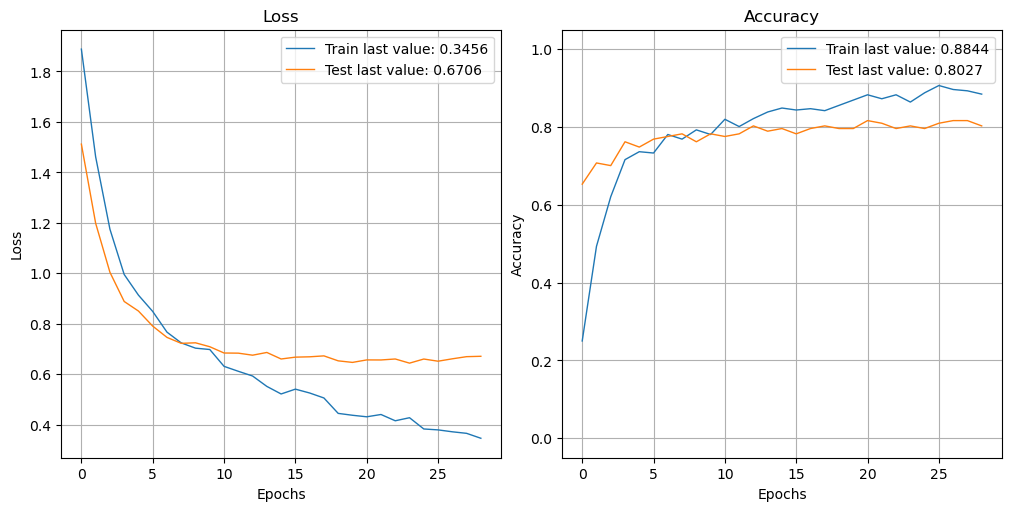

In [17]:
import plot_keras_history
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
#plot_history(history4, path="standard.png")
plt.close()
